<a href="https://colab.research.google.com/github/patgzyl/data-science/blob/master/04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd

In [0]:
df=pd.read_csv('original.csv.xls')

In [8]:
df=df.set_index('timestamp')
df.head()

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
timestamp,,,,,,,,,
2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0


In [3]:
url = 'https://storage.googleapis.com/esmartdata-courses-files/ds-bootcamp/appstore_games.csv'
df_raw = pd.read_csv(url)
df_raw.head()

,URL,ID,Name,Subtitle,Icon URL,Average User Rating,User Rating Count,Price,In-app Purchases,Description,Developer,Age Rating,Languages,Size,Primary Genre,Genres,Original Release Date,Current Version Release Date
0,https://apps.apple.com/us/app/sudoku/id284921427,284921427,Sudoku,NaN,https://is2-ssl.mzstatic.com/image/thumb/Purpl...,4.0,3553.0,2.99,NaN,"Join over 21,000,000 of our fans and download ...",Mighty Mighty Good Games,4+,"DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT...",15853568.0,Games,"Games, Strategy, Puzzle",11/07/2008,30/05/2017
1,https://apps.apple.com/us/app/reversi/id284926400,284926400,Reversi,NaN,https://is4-ssl.mzstatic.com/image/thumb/Purpl...,3.5,284.0,1.99,NaN,"The classic game of Reversi, also known as Oth...",Kiss The Machine,4+,EN,12328960.0,Games,"Games, Strategy, Board",11/07/2008,17/05/2018
2,https://apps.apple.com/us/app/morocco/id284946595,284946595,Morocco,NaN,https://is5-ssl.mzstatic.com/image/thumb/Purpl...,3.0,8376.0,0.00,NaN,Play the classic strategy game Othello (also k...,Bayou Games,4+,EN,674816.0,Games,"Games, Board, Strategy",11/07/2008,5/09/2017
3,https://apps.apple.com/us/app/sudoku-free/id28...,285755462,Sudoku (Free),NaN,https://is3-ssl.mzstatic.com/image/thumb/Purpl...,3.5,190394.0,0.00,NaN,"Top 100 free app for over a year.\nRated ""Best...",Mighty Mighty Good Games,4+,"DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT...",21552128.0,Games,"Games, Strategy, Puzzle",23/07/2008,30/05/2017
4,https://apps.apple.com/us/app/senet-deluxe/id2...,285831220,Senet Deluxe,NaN,https://is1-ssl.mzstatic.com/image/thumb/Purpl...,3.5,28.0,2.99,NaN,"""Senet Deluxe - The Ancient Game of Life and A...",RoGame Software,4+,"DA, NL, EN, FR, DE, EL, IT, JA, KO, NO, PT, RU...",34689024.0,Games,"Games, Strategy, Board, Education",18/07/2008,22/07/2018


In [4]:
df_raw.columns

Index(['URL', 'ID', 'Name', 'Subtitle', 'Icon URL', 'Average User Rating',
       'User Rating Count', 'Price', 'In-app Purchases', 'Description',
       'Developer', 'Age Rating', 'Languages', 'Size', 'Primary Genre',
       'Genres', 'Original Release Date', 'Current Version Release Date'],
      dtype='object')

In [0]:
df=df_raw.copy()

In [10]:
df = df.drop(columns=['URL', 'Icon URL', 'Subtitle', 'Description', 'In-app Purchases'])
df.head()

,ID,Name,Average User Rating,User Rating Count,Price,Developer,Age Rating,Languages,Size,Primary Genre,Genres,Original Release Date,Current Version Release Date
0,284921427,Sudoku,4.0,3553.0,2.99,Mighty Mighty Good Games,4+,"DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT...",15853568.0,Games,"Games, Strategy, Puzzle",11/07/2008,30/05/2017
1,284926400,Reversi,3.5,284.0,1.99,Kiss The Machine,4+,EN,12328960.0,Games,"Games, Strategy, Board",11/07/2008,17/05/2018
2,284946595,Morocco,3.0,8376.0,0.00,Bayou Games,4+,EN,674816.0,Games,"Games, Board, Strategy",11/07/2008,5/09/2017
3,285755462,Sudoku (Free),3.5,190394.0,0.00,Mighty Mighty Good Games,4+,"DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT...",21552128.0,Games,"Games, Strategy, Puzzle",23/07/2008,30/05/2017
4,285831220,Senet Deluxe,3.5,28.0,2.99,RoGame Software,4+,"DA, NL, EN, FR, DE, EL, IT, JA, KO, NO, PT, RU...",34689024.0,Games,"Games, Strategy, Board, Education",18/07/2008,22/07/2018


In [0]:
df=df.set_index('ID')

In [12]:
df.describe()

,Average User Rating,User Rating Count,Price,Size
count,7561.000000,7.561000e+03,16983.000000,1.700600e+04
mean,4.060905,3.306531e+03,0.813419,1.157064e+08
std,0.751428,4.232256e+04,7.835732,2.036477e+08
min,1.000000,5.000000e+00,0.000000,5.132800e+04
25%,3.500000,1.200000e+01,0.000000,2.295014e+07
50%,4.500000,4.600000e+01,0.000000,5.676895e+07
75%,4.500000,3.090000e+02,0.000000,1.330271e+08
max,5.000000,3.032734e+06,179.990000,4.005591e+09


In [13]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Average User Rating,7561.0,4.060905e+00,7.514275e-01,1.0,3.5,4.5,4.5,5.000000e+00
User Rating Count,7561.0,3.306531e+03,4.232256e+04,5.0,12.0,46.0,309.0,3.032734e+06
Price,16983.0,8.134187e-01,7.835732e+00,0.0,0.0,0.0,0.0,1.799900e+02
Size,17006.0,1.157064e+08,2.036477e+08,51328.0,22950144.0,56768954.0,133027072.0,4.005591e+09


In [15]:
df.describe(include=['object']).T

,count,unique,top,freq
Name,17007,16847,Kingdom Shadows,2
Developer,17007,8693,Tapps Tecnologia da Informa\xe7\xe3o Ltda.,123
Age Rating,17007,4,4+,11806
Languages,16947,990,EN,12467
Primary Genre,17007,21,Games,16286
Genres,17007,1004,"Games, Strategy, Puzzle",778
Original Release Date,17007,3084,2/09/2016,75
Current Version Release Date,17007,2512,1/08/2019,118


In [16]:
df.columns = [col.lower().replace(' ', '_') for col in df.columns]
df.head()

,name,average_user_rating,user_rating_count,price,developer,age_rating,languages,size,primary_genre,genres,original_release_date,current_version_release_date
ID,,,,,,,,,,,,
284921427,Sudoku,4.0,3553.0,2.99,Mighty Mighty Good Games,4+,"DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT...",15853568.0,Games,"Games, Strategy, Puzzle",11/07/2008,30/05/2017
284926400,Reversi,3.5,284.0,1.99,Kiss The Machine,4+,EN,12328960.0,Games,"Games, Strategy, Board",11/07/2008,17/05/2018
284946595,Morocco,3.0,8376.0,0.00,Bayou Games,4+,EN,674816.0,Games,"Games, Board, Strategy",11/07/2008,5/09/2017
285755462,Sudoku (Free),3.5,190394.0,0.00,Mighty Mighty Good Games,4+,"DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT...",21552128.0,Games,"Games, Strategy, Puzzle",23/07/2008,30/05/2017
285831220,Senet Deluxe,3.5,28.0,2.99,RoGame Software,4+,"DA, NL, EN, FR, DE, EL, IT, JA, KO, NO, PT, RU...",34689024.0,Games,"Games, Strategy, Board, Education",18/07/2008,22/07/2018


In [17]:
df.primary_genre.value_counts()

Games                16286
Education              222
Entertainment          198
Utilities               77
Sports                  60
Reference               32
Stickers                29
Finance                 18
Business                16
Productivity            15
Lifestyle               10
Social Networking        9
Book                     9
News                     7
Health & Fitness         5
Food & Drink             4
Music                    3
Navigation               3
Medical                  2
Shopping                 1
Travel                   1
Name: primary_genre, dtype: int64

In [18]:
df.primary_genre.value_counts().nlargest(5)

Games            16286
Education          222
Entertainment      198
Utilities           77
Sports              60
Name: primary_genre, dtype: int64

In [19]:
df.primary_genre.value_counts().nlargest(5).index

Index(['Games', 'Education', 'Entertainment', 'Utilities', 'Sports'], dtype='object')

In [20]:
df.age_rating.value_counts()

4+     11806
9+      2481
12+     2055
17+      665
Name: age_rating, dtype: int64

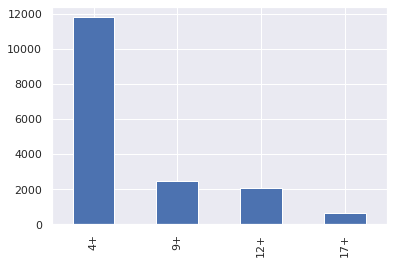

In [22]:
import seaborn as sns
sns.set()
df.age_rating.value_counts().plot(kind='bar')

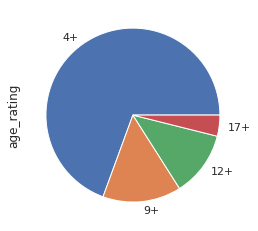

In [24]:
_ =df.age_rating.value_counts().plot(kind='pie')

In [26]:
df.languages.str.split(', ')

ID
284921427     [DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, P...
284926400                                                  [EN]
284946595                                                  [EN]
285755462     [DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, P...
285831220     [DA, NL, EN, FR, DE, EL, IT, JA, KO, NO, PT, R...
                                    ...                        
1474626442                                                 [EN]
1474919257                                                 [EN]
1474962324                                                 [EN]
1474963671                                                 [EN]
1475076711                                             [EN, ZH]
Name: languages, Length: 17007, dtype: object

In [27]:
df.languages.str.split(', ').str.len()

ID
284921427     17.0
284926400      1.0
284946595      1.0
285755462     17.0
285831220     15.0
              ... 
1474626442     1.0
1474919257     1.0
1474962324     1.0
1474963671     1.0
1475076711     2.0
Name: languages, Length: 17007, dtype: float64

In [28]:
df.isnull().sum()

name                               0
average_user_rating             9446
user_rating_count               9446
price                             24
developer                          0
age_rating                         0
languages                         60
size                               1
primary_genre                      0
genres                             0
original_release_date              0
current_version_release_date       0
dtype: int64

In [29]:
df=df.dropna()
df.isnull().sum()


name                            0
average_user_rating             0
user_rating_count               0
price                           0
developer                       0
age_rating                      0
languages                       0
size                            0
primary_genre                   0
genres                          0
original_release_date           0
current_version_release_date    0
dtype: int64